In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
df = pd.read_csv('/content/Height_Weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

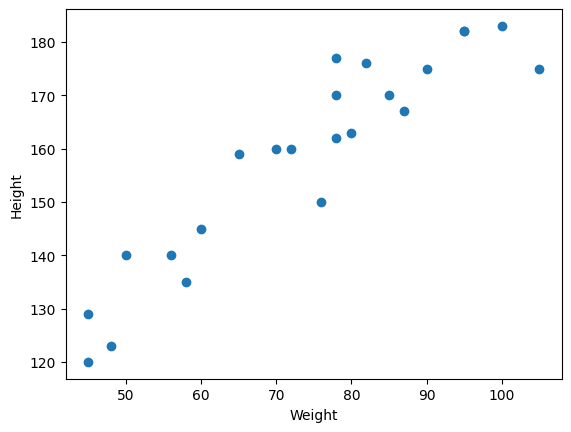

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
#Steps to do while do the machine learning algorithm
#1.Dataset
#2. Divide the dataset into X and y (independent and dependent feature)
#3.Train test split of the dataset
#4. Standardize the dataset (train independent feature data)
#5. Train the model
#6. Performance metrics

In [15]:
#divide the dataset into independent and dependent feature
X=df[['Weight']]
Y=df['Height']

In [16]:
#train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [18]:
X.shape

(23, 1)

In [19]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [20]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler() #Z-score

In [23]:
X_train=scaler.fit_transform(X_train)
#Fit - will compute the mean and standard deviation of the dataset(X_train)
#Transform - will apply the zscore formula on every datapoint

X_test = scaler.transform(X_test)
#Why transform only - because we no need to do the process again like calculate the mean and standard deviation it applies only zscore for each and every on the test data
# it uses the mean and standard deviation of the train dataset

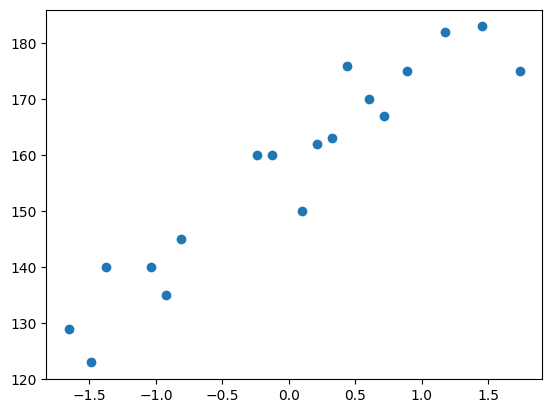

In [25]:
plt.scatter(X_train,Y_train)

In [26]:
#Train the model
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [34]:
#slope
regressor.coef_

array([17.03440872])

In [35]:
#intercept
regressor.intercept_

157.5

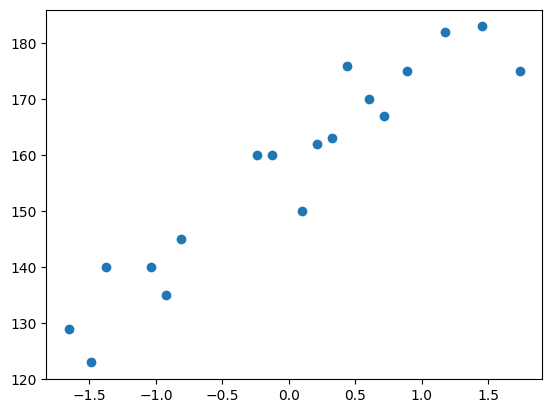

In [36]:
#plot the best fit line
plt.scatter(X_train,Y_train)

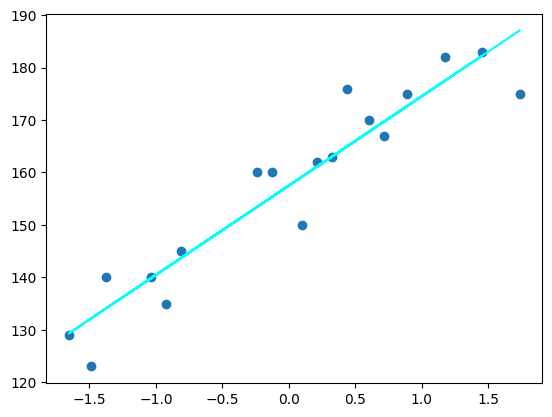

In [38]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),color='cyan')

In [39]:
#Prediction
Y_pred_test = regressor.predict(X_test)

In [40]:
Y_pred_test,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

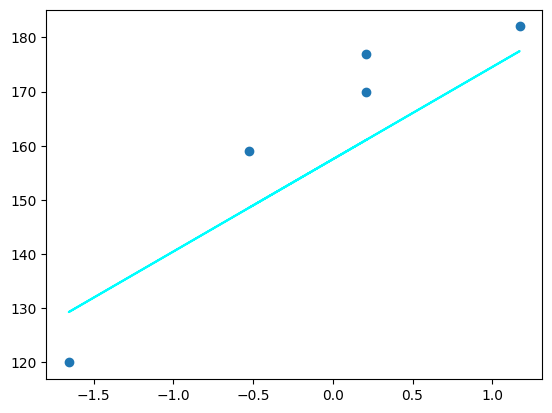

In [41]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),color='cyan')

In [42]:
#Performance metrics
# MSE,MAE,RMSE
# RSquared and adjusted Rsquare

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
#Error
mse = mean_squared_error(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [44]:
#Model Accuracy
#R squared
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred_test)

In [45]:
score

0.776986986042344

In [46]:
#Adjusted R squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [47]:
#new data point like weight is 90
scaled_weight=scaler.transform([[90]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.88886101]])

In [48]:
print(regressor.predict([scaled_weight[0]]))

[172.64122168]


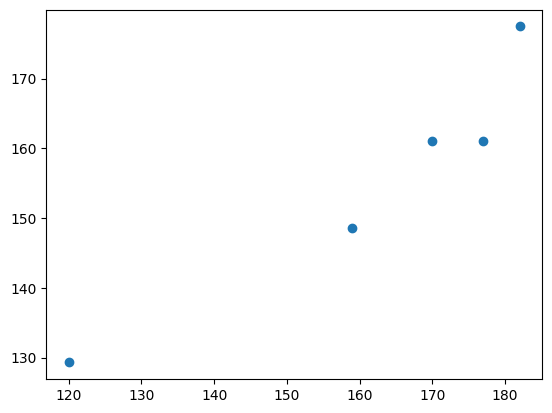

In [49]:
#Assumptions
#plot scatter for prediction

plt.scatter(Y_test,Y_pred_test)

In [50]:
#Residuals

residuals = Y_test-Y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


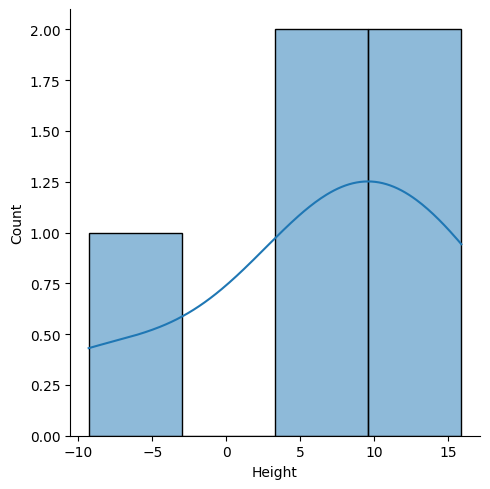

In [51]:
#plot the residuals
import seaborn as sns
sns.displot(residuals,kde = True)

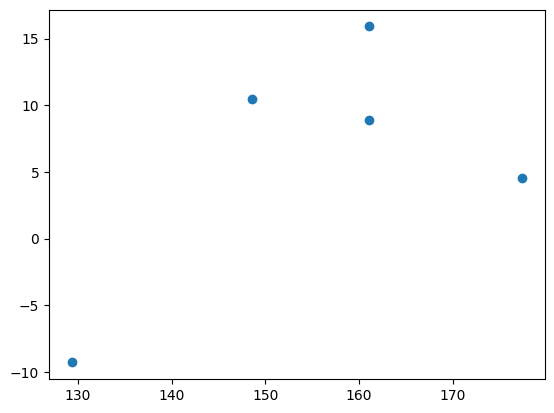

In [52]:
#Scatter plot with prediction and residuals and it shold be a uniform distribution

plt.scatter(Y_pred_test,residuals)